# 基础概念和环境

不管是数据分析还是机器学习，离不开matplotlib、numpy和pandas三剑客的支持



# Matplotlib
    最流行的Python底层绘图库，主要做数据可视化图标，名字取材于matlab，模仿matlab。

## 折线图
Q1 假设一天的的温度为[15,13,14,15,17,20,25,26,24,22,18,15],如何通过图形表示出来？

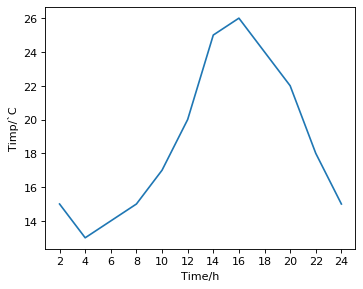

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
# 准备数据
hour = range(2,26,2)
timp = [15,13,14,15,17,20,25,26,24,22,18,15]
# 创建画布，设置画布属性
fig = plt.figure(figsize=(5,4),dpi=80)
# 绘图，设置参数
plt.plot(hour,timp)
plt.xticks(range(2,25,2)) # def xticks(ticks=None, labels=None, **kwargs):
plt.xlabel('Time/h')
plt.ylabel('Timp/`C')
plt.show()

Q2 如果列表a表示10点到12点的每一分钟的气温，如何绘制折线图展示每分钟气温的变化？

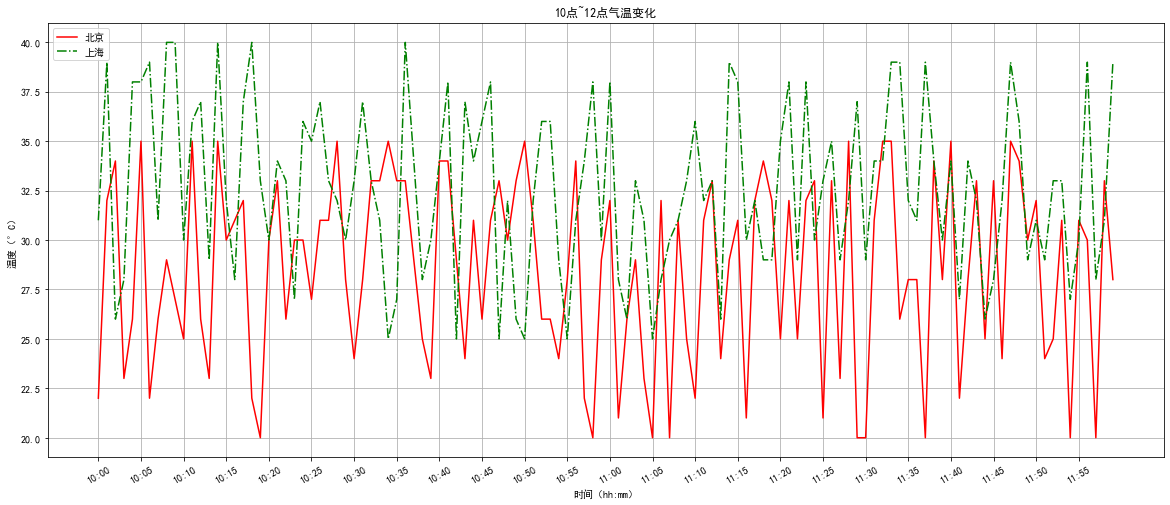

In [3]:
import random
from matplotlib import pyplot as plt
x = range(120)
y = [random.randint(20,35) for i in range(120)]
y2 = [random.randint(25,40) for i in range(120)]
# 创建画布
fig2 = plt.figure(figsize=(20,8))
# 绘图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.plot(x,y,'-r',label='北京')
plt.plot(x,y2,'-.g',label='上海')
_x = list(x)[::5]
_xtick_labels = ['{}:{:02}'.format(10+i//60,i%60) for i in _x]# :02表示2位宽度，不足时在前部用0补齐，详见有道笔记Python数据类型2.4.3.3 格式说明符
plt.xticks(_x,_xtick_labels,rotation=30) #x轴刻度显示设置
plt.xlabel('时间（hh:mm）')
plt.ylabel('温度（°C）')
plt.title('10点~12点气温变化')
plt.grid() # 添加网格
plt.legend(loc='upper left') # 设置图例
plt.show()

## 多图

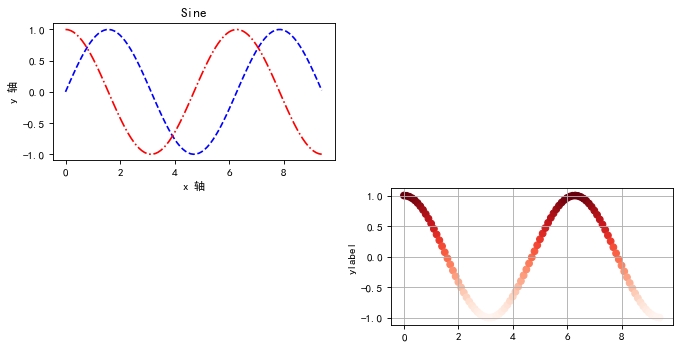

Wall time: 1.5 s


In [4]:
%%time
import numpy as np
%matplotlib inline
# 计算正弦和余弦曲线上的点的 x 和 y 坐标
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig = plt.figure(figsize=(10,5),dpi=80)
# 建立 subplot 网格，行为 2，列为 2
# 激活第一个 subplot,绘制第一个图像，线型图
plt.subplot(2,2,1)
plt.plot(x, y_sin,'b--')
plt.plot(x, y_cos, 'r-.')
plt.title('Sine')
plt.xlabel("x 轴", fontproperties='SimHei')# 在图表中显示中文
plt.ylabel("y 轴", fontproperties='SimHei')
# 将第四个 subplot 激活，并绘制第二个图像，散点图
plt.subplot(2, 2, 4)#绘制散点图
plt.scatter(x,y_cos,c=y_cos,cmap=plt.cm.Reds)#颜色传递给c，这里设置渐变，坐标点y越大，颜色越深
plt.ylabel('ylabel')
plt.grid(True)#绘制网格
# 保存
plt.savefig('./test.png', dpi=800)  # 先保存在展示，dpi代表保存质量
# 展示图像
plt.show()

## 极坐标图

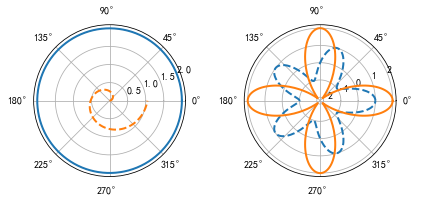

In [5]:
# 准备参数
theta = np.arange(0, 2 * np.pi, 0.02)  # 角度数列值
# 准备画布
fig3 = plt.figure()
# 绘图
plt.subplot(1,2,1,polar=True)   # polar=True为极坐标绘图
plt.plot(theta, 2 * np.ones_like(theta), lw=2)  # 画图，参数：角度，半径，lw线宽
plt.plot(theta, theta / 6, linestyle='--', lw=2)

plt.subplot(1,2,2,polar=True)
plt.plot(theta, np.cos(5 * theta), linestyle='--', lw=2)
plt.plot(theta, 2 * np.cos(4 * theta), lw=2)

# 保存
# plt.savefig('./test_polar.png', dpi=1000)  # 先保存在展示，dpi代表保存质量

# 显示
fig3.tight_layout()
plt.show()

## 绘制柱状图(bar)/条形图(barh)

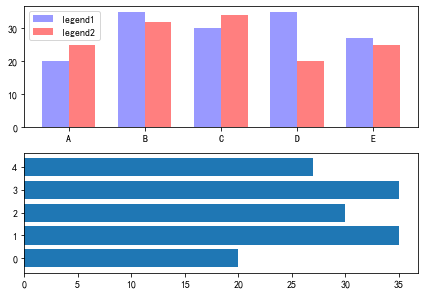

In [6]:
# 准备数据
x_index = np.arange(5)  # 柱的索引
x_data = ('A', 'B', 'C', 'D', 'E')
y1_data = (20, 35, 30, 35, 27)
y2_data = (25, 32, 34, 20, 25)
bar_width = 0.35  # 定义一个数字代表每个独立柱的宽度
plt.subplot(2,1,1)
rects1 = plt.bar(x_index, y1_data, width=bar_width, alpha=0.4, color='b', label='legend1')  # 参数：左偏移、数值、高度、柱宽、透明度、颜色、图例
rects2 = plt.bar(x_index + bar_width, y2_data, width=bar_width, alpha=0.5, color='r',
                 label='legend2')  # 参数：左偏移、数值、高度、柱宽、透明度、颜色、图例
# 关于左偏移，不用关心每根柱的中心不中心，因为只要把刻度线设置在柱的中间就可以了
plt.xticks(x_index + bar_width / 2, x_data)  # x轴刻度线（居中对齐）
plt.legend()  # 显示图例
plt.tight_layout()  # 自动控制图像外部边缘，此方法不能够很好的控制图像间的间隔

plt.subplot(2,1,2)
rects1 = plt.barh(x_index, y1_data)

plt.show()


## 显示图片

In [7]:
import  cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget
# 调用前请打开摄像头软件和硬件开关
def show_camera(camera_ID=0,window_name='camera',color=cv2.WINDOW_NORMAL):
    """
    show camera vedio on the interface
    :param camera_ID:摄像头ID编号，0一般表示自带摄像头
    :param window_name:
    :param color:
    :return:
    """
    cap = cv2.VideoCapture(camera_ID)
    index = 0
    while True:
        ret, frame = cap.read()
        set_color = cv2.cvtColor(frame, color)
        cv2.imshow(window_name,set_color)

#         current_time = time.strftime('%Y%m%d%H%M%S', time.localtime(time.time()))
        cv2.imwrite('./lessons/cutpicture1.jpg', frame)
        img=cv2.imread('./lessons/cutpicture1.jpg')
        fig = plt.figure()
        plt.subplot(2,2,1)
        plt.imshow(img)
        plt.title('原始图片RGB',fontproperties='SimHei')
        plt.subplot(2,2,2)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.title('修正后BGR',fontproperties='SimHei')
        plt.subplot(2,2,3)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
        plt.title('GRAY')
        plt.subplot(2,2,4)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))
        plt.title('HSV')
        fig.tight_layout() # 自动设置图片间距，不写这句会重叠
        plt.show()
        break
    cap.release()
    cv2.destroyWindow(window_name)
    
show_camera()


error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## 散点图

假设通过爬虫获取了北京市2016年3，10月的的每天白天的最高气温，那么此时如寻找出气温和时间的变化规律？

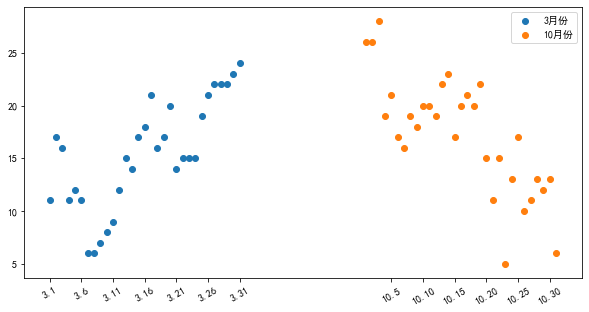

In [8]:
from matplotlib import pyplot as plt
# 准备数据
m_3 = range(1,32)
m_10 = range(51,82)
tmp_3 = [11,17,16,11,12,11,6,6,7,8,9,12,15,14,17,18,21,16,17,20,14,15,15,15,19,21,22,22,22,23,24]
tmp_10 = [26,26,28,19,21,17,16,19,18,20,20,19,22,23,17,20,21,20,22,15,11,15,5,13,17,10,11,13,12,13,6] 
# 创建画布
fig26 = plt.figure(figsize=(10,5))
# 绘图
plt.scatter(m_3,tmp_3,label='3月份')
plt.scatter(m_10,tmp_10,label='10月份')

_x = list(m_3) + list(m_10)
_x_sticks = ['3.{}'.format(i) for i in m_3] +  ['10.{}'.format(j-50) for j in m_10]
plt.xticks(_x[::5],_x_sticks[::5],rotation=30)
plt.legend()


plt.show()

## 更多图例
matplotlab可以绘制相当多的图表，其他示例可查看：  
1. [matplotlib绘图入门详解](https://www.jianshu.com/p/da385a35f68d)
2. [Matplotlib 可视化最有价值的 50 个图表（附完整 Python 源代码）](http://www.sohu.com/a/285138406_671965)
3. [Matplotlib官方指导网站(非常丰富的图标类型及实例***)](https://matplotlib.org/gallery/index.html)

## 绘制直方图

直方图的划分原则：若数据在100以内，组数选在5~12；若数据大于100，则组数=极差/组距；

[120, 142, 125, 125, 113, 131, 140, 117, 154, 144, 127, 134, 126, 134, 163, 132, 152, 144, 134, 135, 118, 110, 135, 133, 126, 130, 148, 142, 117, 147, 135, 127, 149, 138, 121, 162, 122, 151, 120, 128, 131, 124, 135, 128, 159, 132, 142, 142, 163, 155, 148, 118, 149, 157, 137, 164, 125, 114, 140, 120, 113, 138, 138, 119, 131, 113, 118, 116, 141, 146, 126, 137, 163, 118, 143, 141, 124, 133, 145, 138, 140, 115, 154, 116, 121, 145, 134, 110, 158, 160, 118, 161, 134, 139, 158, 162, 141, 124, 151, 118]


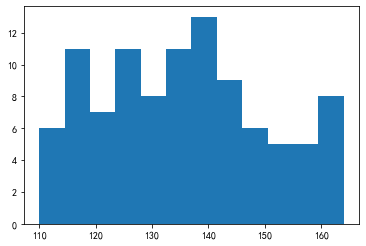

In [9]:
from matplotlib import pyplot as plt
y = [(random.randint(100,150) + random.randint(10,15)) for i in range(100)]
print(y)

# 绘制直方图，分为12组
plt.hist(y,12)
plt.show()

## 其他前端图形绘制方式

百度Echart
(https://www.echartsjs.com/zh/index.html)

 plotly

# Numpy

## 简介
  NumPy是Python语言的一个扩充程序库。支持高级大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。Numpy内部解除了[CPython的GIL](https://www.cnblogs.com/wj-1314/p/9056555.html)（全局解释器锁），运行效率极好，是大量机器学习框架的基础库！
NumPy的全名为Numeric Python，是一个开源的Python科学计算库，它包括：
- 一个强大的N维数组对象ndrray；
- 比较成熟的（广播）函数库；
- 用于整合C/C++和Fortran代码的工具包；
- 实用的线性代数、傅里叶变换和随机数生成函数  

NumPy的优点：
- 对于同样的数值计算任务，使用NumPy要比直接编写Python代码便捷得多；
- NumPy中的数组的存储效率和输入输出性能均远远优于Python中等价的基本数据结构，且其能够提升的性能是与数组中的元素成比例的；
- NumPy的大部分代码都是用C语言写的，其底层算法在设计时就有着优异的性能，这使得NumPy比纯Python代码高效得多  

NumPy的缺点:  
- 由于NumPy使用内存映射文件以达到最优的数据读写性能，而内存的大小限制了其对TB级大文件的处理；  
- 此外，NumPy数组的通用性不及Python提供的list容器。  
因此，在科学计算之外的领域，NumPy的优势也就不那么明显。

### 数组的属性

In [10]:
# 获取矩阵基本属性
a = [[1,2,3],[2,3,4]]
array = np.array(a)
print(array)
print('矩阵维度:',array.ndim) # 秩，矩阵维度
print('矩阵形状:',array.shape) # 矩阵形状
print('矩阵元素数量:',array.size) # 矩阵元素数量

[[1 2 3]
 [2 3 4]]
矩阵维度: 2
矩阵形状: (2, 3)
矩阵元素数量: 6


In [11]:
# 修改形状
t4 = np.arange(12)
t5 = t4.reshape(3,4)
print(t4)
print(t5)
t6 = t4.reshape(2,3,2)
print(t6)
# 转化为一维数组
t7 = t4.reshape(12,)
print(t7)
print(t4.flatten())

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


### 数组轴的概念

    我们所熟知的笛卡尔坐标系有两个轴：x轴和y轴，用来指示方向，并确定空间中的点。numpy中的轴与之类似，可以规定数组的方向和索引位置.
    在1维数组中，轴是沿着列方向眼神，AXIS 0是沿着列的方向；
    在2维数组中，轴是沿行和列方向延伸，AXIS 0是沿着行的方向，AXIS 1是沿着列的方向。
    在3维数组中，AXIS 0表示组，AXIS 1是沿着行的方向，AXIS 2是沿着列的方向。
    依此类推....

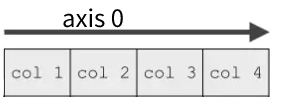

In [102]:
from IPython.display import Image
Image(filename = 'JobClass/net/cache/1维.png', width=300, height=100)

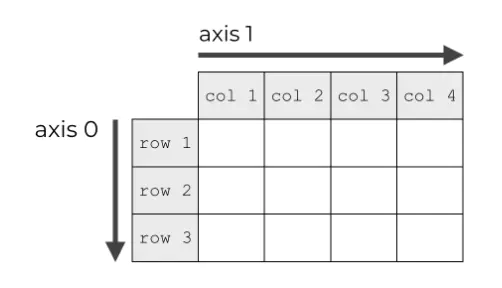

In [47]:
from IPython.display import Image
Image(filename = 'JobClass/net/cache/8826670-a9c92d2265939acd.png', width=400, height=100)

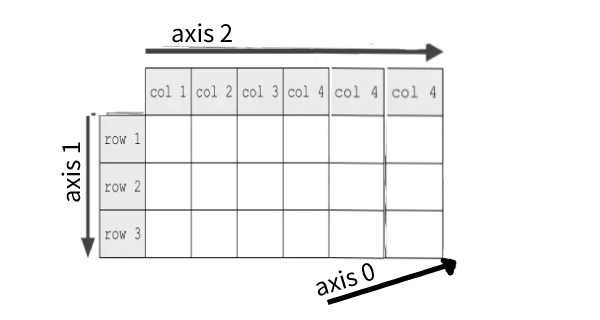

In [50]:
from IPython.display import Image
Image(filename = 'JobClass/net/cache/轴.png', width=400, height=300)

In [7]:
import numpy as np
a=np.arange(16).reshape(2,4,2)
print(a)
print(np.sum(a,axis=2))
print(a[0,0,1])

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]]
[[ 1  5  9 13]
 [17 21 25 29]]
1


## 生成数组 

### 指定数据类型

NumPy 支持比 Python 更多种类的数值类型，为了区别于 Python 原生的数据类型，bool、int、float、complex、str 等类型名称末尾都加了_，详细的数据类型列表可在以下网址查看：https://www.cnblogs.com/gl1573/p/10549547.html。


In [12]:
import numpy as np
# 将list转换为数组
t1 = np.array([1,2,3])
print('t1:',t1)
print(type(t1))

# 等差数组
t2 = np.array(range(1,10,2))
t3 = np.arange(1,10,2)
print('t2:',t2)
print('t3:',t3)

t1: [1 2 3]
<class 'numpy.ndarray'>
t2: [1 3 5 7 9]
t3: [1 3 5 7 9]


In [13]:
# 指定数据类型
a = np.array([2,3,4],dtype=np.float32)
print(a)
print(a.dtype)

[2. 3. 4.]
float32


In [14]:
# 修改数据类型
t5 = np.array([1,0,1,0,0,1,0,1,1],dtype=bool)
print(t5)
t6 = t5.astype('int8')
print(t6)

[ True False  True False False  True False  True  True]
[1 0 1 0 0 1 0 1 1]


In [15]:
# 取小数
t7 = [np.random.random() for i in range(10)]
print(t7)
t8 = np.round(t7,2)
print(t8)

[0.5694514253387559, 0.09958501756756144, 0.4819146799672709, 0.8004748509238055, 0.7386290332506288, 0.1664115507439976, 0.8619198307566144, 0.8589587903010069, 0.42236399786969203, 0.18319322867061671]
[0.57 0.1  0.48 0.8  0.74 0.17 0.86 0.86 0.42 0.18]


### 生成特定元素的数组

（1）全零矩阵

In [8]:
zero = np.zeros((2,3,4),dtype=np.int8)
print(zero)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [7]:
# 类似矩阵
a = np.array([[1,2,3],[2,3,4]])
like = np.zeros_like(a)
print(a)
print(like)

array([[0, 0, 0],
       [0, 0, 0]])

(2) 全1矩阵

In [17]:
one = np.ones((3,4),dtype=np.int32)
print(one)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [32]:
# 类似矩阵
a = np.array([[1,2,3],[2,3,4]])
like = np.ones_like(a)
print(a)
print(like)

[[1 2 3]
 [2 3 4]]
[[1 1 1]
 [1 1 1]]


(3) 全空矩阵

In [18]:
empty = np.empty((3,4))
print(empty)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [38]:
# 类似矩阵
a = np.array([[1,2,3],[2,3,4]])
like = np.empty_like(a)
print(a)
print(like)

[[1 2 3]
 [2 3 4]]
[[1 2 3]
 [2 3 4]]


(4) 有序数列

In [19]:
range = np.arange(10,20,2) # [10,20)
print(range)

[10 12 14 16 18]


(5) 指定shape的矩阵

In [20]:
shape = np.arange(12).reshape((3,4))
print(shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


(6) 线段

In [39]:
# 生成从开始到终止指定间隔内均匀间隔的数字序列。
line = np.linspace(10,20,5)
print(line)

[10.  12.5 15.  17.5 20. ]


In [42]:
# 生成固定间隔内的指定数目的等比数列，默认是意10为底的。
a = np.logspace(1.0,2.0,num=10)
print(a)

[ 10.          12.91549665  16.68100537  21.5443469   27.82559402
  35.93813664  46.41588834  59.94842503  77.42636827 100.        ]


(7) 单位矩阵

In [158]:
import numpy as np
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 数组的运算

### 数组+数字

In [59]:
import numpy as np
a = np.arange(2,10,2)
print('a:   ',a)
# 加 
print('a+2: ',a+2)
# 减
print('a-2: ',a-2)
# 乘
print('a*2: ',a*2)
# 除
print('a/2: ',a/2)
# 幂次方
print('a**2:',a**2)
# 直接判断
print('a<5: ',a<5)
# 直接数学运算
print('10*np.sin(a):',10*np.sin(a))

a:    [2 4 6 8]
a+2:  [ 4  6  8 10]
a-2:  [0 2 4 6]
a*2:  [ 4  8 12 16]
a/2:  [1. 2. 3. 4.]
a**2: [ 4 16 36 64]
a<5:  [ True  True False False]
10*np.sin(a): [ 9.09297427 -7.56802495 -2.79415498  9.89358247]


### 数组+数组

In [22]:
import numpy as np
a = np.arange(1,11).reshape(2,5)
b = np.arange(2,12).reshape(2,5)
print('a:\n',a)
print('b:\n',b)
# 加
print('a+b:\n',a+b)
# 减
print('a-b:\n',a-b)
# 乘
print('a*b:\n',a*b)
# 除
print('a/b:\n',a/b)

a:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
b:
 [[ 2  3  4  5  6]
 [ 7  8  9 10 11]]
a+b:
 [[ 3  5  7  9 11]
 [13 15 17 19 21]]
a-b:
 [[-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
a*b:
 [[  2   6  12  20  30]
 [ 42  56  72  90 110]]
a/b:
 [[0.5        0.66666667 0.75       0.8        0.83333333]
 [0.85714286 0.875      0.88888889 0.9        0.90909091]]


In [23]:
import numpy as np
a = np.arange(1,11).reshape(2,5)
b = np.arange(2,7).reshape(1,5)
print('a:\n',a)
print('b:\n',b)
# 加
print('a+b:\n',a+b)
# 减
print('a-b:\n',a-b)
# 乘
print('a*b:\n',a*b)
# 除
print('a/b:\n',a/b)

a:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
b:
 [[2 3 4 5 6]]
a+b:
 [[ 3  5  7  9 11]
 [ 8 10 12 14 16]]
a-b:
 [[-1 -1 -1 -1 -1]
 [ 4  4  4  4  4]]
a*b:
 [[ 2  6 12 20 30]
 [12 21 32 45 60]]
a/b:
 [[0.5        0.66666667 0.75       0.8        0.83333333]
 [3.         2.33333333 2.         1.8        1.66666667]]


In [25]:
import numpy as np
a = np.arange(1,11).reshape(2,5)
b = np.array([1,2]).reshape(2,1)
print('a:\n',a)
print('b:\n',b)
# 加
print('a+b:\n',a+b)
# 减
print('a-b:\n',a-b)
# 乘
print('a*b:\n',a*b)
# 除
print('a/b:\n',a/b)

a:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
b:
 [[1]
 [2]]
a+b:
 [[ 2  3  4  5  6]
 [ 8  9 10 11 12]]
a-b:
 [[0 1 2 3 4]
 [4 5 6 7 8]]
a*b:
 [[ 1  2  3  4  5]
 [12 14 16 18 20]]
a/b:
 [[1.  2.  3.  4.  5. ]
 [3.  3.5 4.  4.5 5. ]]


In [32]:
import numpy as np
a = np.arange(1,11).reshape(2,5)
b = np.arange(1,11).reshape(2,5)
print('a:\n',a)
print('b:\n',b)
# 加
print('a+b:\n',a+b)
# 减
print('a-b:\n',a-b)
# 乘
print('a*b:\n',a*b)
# 除
print('a/b:\n',a/b)

a:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
b:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
a+b:
 [[ 2  4  6  8 10]
 [12 14 16 18 20]]
a-b:
 [[0 0 0 0 0]
 [0 0 0 0 0]]
a*b:
 [[  1   4   9  16  25]
 [ 36  49  64  81 100]]
a/b:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


广播原则：如果两个数组的后缘维度(trailing dimension, 即从末尾开始算起的维度)的轴长度相符或者其中一方长度为1，则认为他们是广播兼容的，广播会在缺失和（或）长度为1的维度上进行。广播主要发生在两种情况，一种是两个数组的维数不相等，但是它们的后缘维度的轴长相符，另外一种是有一方的长度为1。

In [104]:
from IPython.display import IFrame
IFrame('https://www.cnblogs.com/yangmang/p/7125458.html', width=1000, height=500)

### 矩阵运算及统计方法

- 转置：t.T
- 求和：t.sum()
- 均值：t.mean()
- 中值：t.median()
- 最大值：t.max()
- 最小值：t.min()
- 极值：t.ptp()
- 标准差：t.std()

In [39]:
# 矩阵转置
import numpy as np
a = np.arange(1,7).reshape(2,3)
print('a:\n',a)
print('a.T:\n',a.T)# 转置
print('a.transpose():\n',a.transpose())# 转置
print('a.swapaxes(1,0):\n',a.swapaxes(1,0))# 交换轴

a:
 [[1 2 3]
 [4 5 6]]
a.T:
 [[1 4]
 [2 5]
 [3 6]]
a.transpose():
 [[1 4]
 [2 5]
 [3 6]]
a.swapaxes(1,0):
 [[1 4]
 [2 5]
 [3 6]]


In [37]:
# 矩阵乘法
c1 = np.arange(1,7).reshape(2,3)
c2 = np.arange(1,7).reshape(3,2)
print('c1:\n',c1)
print('c2:\n',c2)
print('np.dot(c1,c2) :\n',np.dot(c1,c2) )
print('c1.dot(c2):\n',c1.dot(c2))

c1:
 [[1 2 3]
 [4 5 6]]
c2:
 [[1 2]
 [3 4]
 [5 6]]
np.dot(c1,c2) :
 [[22 28]
 [49 64]]
c1.dot(c2):
 [[22 28]
 [49 64]]


In [47]:
#  矩阵求和/最大值/最小值/平均值
c1 = np.arange(1,7).reshape(2,3)
print('c1:\n',c1)
print('np.sum(c1):\n',np.sum(c1))
print('np.sum(c1,axis=1):\n',np.sum(c1,axis=1))
print('np.max(c1,axis=1):\n',np.max(c1,axis=1))
print('np.min(c1,axis=0):\n',np.max(c1,axis=0))
print('np.mean(c1,axis=0):\n',np.mean(c1,axis=0))

c1:
 [[1 2 3]
 [4 5 6]]
np.sum(c1):
 21
np.sum(c1,axis=1):
 [ 6 15]
np.max(c1,axis=1):
 [3 6]
np.min(c1,axis=0):
 [4 5 6]
np.mean(c1,axis=0):
 [2.5 3.5 4.5]


In [66]:
# 获得最大值/最小值所在索引
c1 = np.arange(1,7).reshape(2,3)
print('c1:\n',c1)
print('np.argmax(c1) =',np.argmax(c1))
print('np.argmin(c1) =',np.argmin(c1))

c1:
 [[1 2 3]
 [4 5 6]]
np.argmax(c1) = 5
np.argmin(c1) = 0


### 元素累加/限值

In [69]:
c1 = np.arange(1,7).reshape(2,3)
print('c1:\n',c1)
print('累加 np.cumsum(c1):\n',np.cumsum(c1))
print('限值 c1.clip(2,5):\n',c1.clip(2,5))

c1:
 [[1 2 3]
 [4 5 6]]
累加 np.cumsum(c1):
 [ 1  3  6 10 15 21]
限值 c1.clip(2,5):
 [[2 2 3]
 [4 5 5]]


In [140]:
# 替换
c1 = np.arange(1,7).reshape(2,3)
print('c1:\n',c1)
print('c1<5:\n',c1<5)
c1[c1<5] = -1
print('c1[c1<5]=-1:\n',c1)

c1:
 [[1 2 3]
 [4 5 6]]
c1<5:
 [[ True  True  True]
 [ True False False]]
c1[c1<5]=-1:
 [[-1 -1 -1]
 [-1  5  6]]


In [139]:
# 限值
c1 = np.arange(1,7).reshape(2,3)
print('c1:\n',c1)
c2 = np.where(c1<=5,0,100)
print(c2)

c1:
 [[1 2 3]
 [4 5 6]]
[[  0   0   0]
 [  0   0 100]]


### 索引/切片

In [127]:
# 索引
import numpy as np
d1 = np.arange(3,15).reshape((3,4))
print('d1:\n',d1)
print('d1[1]:\n',d1[1]) # 整行索引
print('d1[:,1]:\n',d1[:,1]) # 整列索引
print('d1[1,1]:\n',d1[1,1]) # 取单值
print('d1[0:2,1]:\n',d1[0:2,1]) # 切一块
print('id(d1)',id(d1))
print('id(d1[1])',id(d1[1]))

d1:
 [[ 3  4  5  6]
 [ 7  8  9 10]
 [11 12 13 14]]
d1[1]:
 [ 7  8  9 10]
d1[:,1]:
 [ 4  8 12]
d1[1,1]:
 8
d1[0:2,1]:
 [4 8]
id(d1) 2465443671136
id(d1[1]) 2465443775552


In [83]:
# 打印
import numpy as np
d1 = np.arange(3,15).reshape((3,4))
print('d1:\n',d1)
for row in d1:
    print(row)
for colum in d1.T:
    print(colum)
for items in d1.flat: #flat将矩阵展开为行矩阵
    print(items)

d1:
 [[ 3  4  5  6]
 [ 7  8  9 10]
 [11 12 13 14]]
[3 4 5 6]
[ 7  8  9 10]
[11 12 13 14]
[ 3  7 11]
[ 4  8 12]
[ 5  9 13]
[ 6 10 14]
3
4
5
6
7
8
9
10
11
12
13
14


### 数组合并/分割/复制

In [33]:
# 合并
import numpy as np
e1 = np.arange(1,7).reshape(2,3)
e2 = np.arange(1,7).reshape(2,3)
print('e1:\n',e1)
print('e2:\n',e2)
print('*'*10,'列向合并','*'*10)
# 列向合并
print(np.hstack((e1,e2)))
print(np.concatenate((e1,e2),axis=1))
# 行向合并
print('*'*10,'行向合并','*'*10)
print(np.vstack((e1,e2)))
print(np.concatenate((e1,e2),axis=0))

e1:
 [[1 2 3]
 [4 5 6]]
e2:
 [[1 2 3]
 [4 5 6]]
********** 列向合并 **********
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]
********** 行向合并 **********
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


In [115]:
# 分割
g1 = np.arange(12).reshape((3,4))
print(g1)
# 等量分割
print(np.hsplit(g1,2))
print(np.split(g1,2,axis=1))
print(np.vsplit(g1,3))
print(np.split(g1,3,axis=0))
# 不等量分割
print(np.array_split(g1,2,axis=0))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]


In [125]:
# 复制
print('*'*10,'浅复制(同一内存地址)','*'*10)
a = np.arange(4)
d = a
a[0] = 15
d[3] = 20
print(a)
print(d)
print(d is a)
print('id(a)',id(a))
print('id(d)',id(d))

print('*'*10,'深复制(不同内存地址)','*'*10)
a = np.arange(6)
b = np.copy(a)
a[0]=666
print(a)
print(b)
print('id(a)',id(a))
print('id(b)',id(b))

********** 浅复制(同一内存地址) **********
[15  1  2 20]
[15  1  2 20]
True
id(a) 2465443465376
id(d) 2465443465376
********** 深复制(不同内存地址) **********
[666   1   2   3   4   5]
[0 1 2 3 4 5]
id(a) 2465443777552
id(b) 2465443777392


### nan/inf

nan：
- 1. 当我们读取本地文件维float类型时，如果有缺失，就会出现nan
- 2. 当做了一个不合适的计算的时候（例如inf-inf）

inf:
- 1. 一个数组除以0（python会报错，numpy结果为inf或-inf）

In [155]:
# 两个nan不相等
print(np.nan == np.nan)
# 计算数组中的nan个数
a = np.array([1,np.nan,3])
print(a)
print(np.count_nonzero(a))# 计算个数
print(a!=a) # 两个nan不相等
print(np.isnan(a)) # 计算有几个nan
print(np.count_nonzero(a!=a)) #计算有几个nan
print(np.count_nonzero(np.isnan(a))) # 计算有几个nan
# nan和任何值计算都是nan
print(a*3)
print(np.sum(a))

False
[ 1. nan  3.]
3
[False  True False]
[False  True False]
1
1
[ 3. nan  9.]
nan


### 随机方法

In [29]:
# 均匀分布
import numpy as np
print(np.random.rand(2,3))# 均匀分布
print(np.random.randn(2,3))# 正态分布
print(np.random.randint(0,20,(3,4)))# 随机整数
print(np.random.uniform(0,20,(3,4)))# 均匀分布

# 利用seed，每次运行产生相同的随机数
np.random.seed(100)
print(np.random.randint(0,20,(3,4)))

[[0.15037787 0.68381843 0.81660184]
 [0.33607158 0.89081653 0.19812181]]
[[ 0.31085074  1.72937588 -0.24066194]
 [-1.02735202  0.42401507  1.40862087]]
[[12  1  4 18]
 [13 11 10  9]
 [15 18 16  7]]
[[ 1.53711003 17.06085981  8.79974911  2.43908294]
 [14.63469249  2.77564931 15.33760098 16.63979536]
 [ 6.1955611  11.95164581 17.4478492  19.66041734]]
[[ 8  3  7 15]
 [16 10  2  2]
 [ 2 14  2 17]]


In [34]:
from IPython.display import IFrame
IFrame('https://blog.csdn.net/weixin_42029738/article/details/81977492', width=1000, height=500)

## numpy读取数据
    padnas的数据读取比numpy强大的多，所以numpy读取数据不常用。

In [23]:
import numpy as np
# np.loadtxt()
# 参数
# loadtxt(fname, dtype=float(数据类型), comments='#', delimiter=None(分隔符),
#             converters=None, skiprows=0, usecols=None, unpack=False,
#             ndmin=0, encoding='bytes', max_rows=None)

# Pandas

    numpy能够帮助我们处理数值型数据，但常常我们的数据除了数值，还有字符串、时间序列等，这就需要pandas。
    Pandas是一个强大的分析结构化数据的工具集；它的使用基础是Numpy（提供高性能的矩阵运算）；用于数据挖掘和数据分析，同时也提供数据清洗功能。
- Series：一维数组，与Numpy中的一维array类似。二者与Python基本的数据结构List也很相近。Series如今能保存不同种数据类型，字符串、boolean值、数字等都能保存在Series中。
- Time- Series：以时间为索引的Series。
- DataFrame：二维的表格型数据结构。很多功能与R中的data.frame类似。可以将DataFrame理解为Series的容器。
- Panel ：三维的数组，可以理解为DataFrame的容器。
- Panel4D：是像Panel一样的4维数据容器。
- PanelND：拥有factory集合，可以创建像Panel4D一样N维命名容器的模块。

官方网址：https://pandas.pydata.org/pandas-docs/stable/index.html   (有详细的用户使用手册)

## Series

### 创建Series

In [12]:
# 将列表转换为series
import pandas as pd
import numpy as np
a1 = pd.Series([1,2,3,np.nan,44,1],dtype=np.float32)
print(a1)
print(type(a1))

0     1.0
1     2.0
2     3.0
3     NaN
4    44.0
5     1.0
dtype: float32
<class 'pandas.core.series.Series'>


In [21]:
# 将字典转换为Series
temp_dict = {'name':'xiaohong','age':30,'tel':10086}
s3 = pd.Series(temp_dict)
print(s3)

name    xiaohong
age           30
tel        10086
dtype: object


In [3]:
# 如果数据是常量值，则必须提供索引。将重复该值以匹配索引的长度。
import pandas as pd
import numpy as np
res = pd.Series(5,index=[1,2,3,4,5])
print(res)   

1    5
2    5
3    5
4    5
5    5
dtype: int64


In [22]:
# 自定义索引
import string
t = pd.Series(np.arange(10),index=list(string.ascii_uppercase[:10]))
print(t)

A    0
B    1
C    2
D    3
E    4
F    5
G    6
H    7
I    8
J    9
dtype: int32


In [20]:
# 重新自定义索引
a = {string.ascii_uppercase[i]: i for i in range(10)}
b = pd.Series(a)
print(b)
c =pd.Series(a,index = list(string.ascii_uppercase[5:15]))
print(c) # NaN为float类型，所以Series类型自动切换

A    0
B    1
C    2
D    3
E    4
F    5
G    6
H    7
I    8
J    9
dtype: int64
F    5.0
G    6.0
H    7.0
I    8.0
J    9.0
K    NaN
L    NaN
M    NaN
N    NaN
O    NaN
dtype: float64


### 数据查询

In [2]:
# 通过序号查询
import pandas as pd
data = [1,2,3,4,5]
res = pd.Series(data,index=["a","b","c","d","e"])
print(res[0:3],"\n---")  # 这里跟python的切片一样
print(res[3],"\n---")
print(res[-3:],"\n---")
res1 = pd.Series(data)
print(res1,'\n---')
print(res1[[2,4]])

a    1
b    2
c    3
dtype: int64 
---
4 
---
c    3
d    4
e    5
dtype: int64 
---
0    1
1    2
2    3
3    4
4    5
dtype: int64 
---
2    3
4    5
dtype: int64


In [3]:
# 通过index查询
data = [1,2,3,4,5]
res = pd.Series(data,index=["a","b","c","d","e"])
print(res["a"],'\n------')
# 检索多个值 标签用中括号包裹
print(res[["a","b"]]) # 如果用没有的标签检索则会抛出异常KeyError: 'f'

1 
------
a    1
b    2
dtype: int64


In [20]:
# 使用head()/tail()查看前几个或后几个
data = [1,2,3,4,5]
res = pd.Series(data,index=["a","b","c","d","e"])
print('res.head(3):\n',res.head(3),'\n---')  # 查看前三个
print('res.tail(2) :\n',res.tail(2) ,'\n---')# 查看后两个

res.head(3):
 a    1
b    2
c    3
dtype: int64 
---
res.tail(2) :
 d    4
e    5
dtype: int64 
---


In [20]:
# 如果将布尔值作为Serrise的索引，则只保留True对应的元素值
s = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","e"])
print(s)
print(s[[True,True,False,False,True]] )

a    1
b    2
c    3
d    4
e    5
dtype: int64
a    1
b    2
e    5
dtype: int64


### 其他操作(去重、相加、缺省)

In [23]:
# unique() 对series元素进行去重
s = pd.Series(data=[1,1,2,2,3,4,5,6,6,6,7,6,6,7,8])
s.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [9]:
# 多个Series相加
# - 在运算中自动对齐不同索引的数据
#- 如果索引不对应，则补NaN
s1 = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","e"])
print(s1)
s2 = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","f"])
print(s2)
s3 = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","g"])
s = s1 + s2 +s3
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64
a    1
b    2
c    3
d    4
f    5
dtype: int64
a     3.0
b     6.0
c     9.0
d    12.0
e     NaN
f     NaN
g     NaN
dtype: float64


In [16]:
# 监测缺失的值isnull、notnull
import pandas as pd
import numpy as np
s = pd.Series(data=[1,2,np.nan,4,5],index=["a","b","c","d","e"])
print(s)
print(s.isnull())
print(s.notnull())

a    1.0
b    2.0
c    NaN
d    4.0
e    5.0
dtype: float64
a    False
b    False
c     True
d    False
e    False
dtype: bool
a     True
b     True
c    False
d     True
e     True
dtype: bool


In [25]:
# 取出所有空的数据和所有不为空的数据
s = pd.Series(data=[1,2,np.nan,4,5],index=["a","b","c","d","e"])
print(s[s.isnull()])  # 取出所有nan的元素
print(s[s.notnull()]) # 取出所有不是nan的元素

c   NaN
dtype: float64
a    1.0
b    2.0
d    4.0
e    5.0
dtype: float64


## Time-Series

时间序列（time series）数据是一种重要的结构化数据形式，具体的应用场景，主要有以下几种：

- 时间戳（timestamp），特定的时刻。
- 固定时期（period），如2007年1月或2010年全年。
- 时间间隔（interval），由起始和结束时间戳表示。时期（period）可以被看做间隔（interval）的特例。
- 实验或过程时间，每个时间点都是相对于特定起始时间的一个度量。例如，从放入烤箱时起，每秒钟饼干的直径。

下表显示了pandas可以处理的时间相关类的类型以及如何创建它们：

|Class|Remarks|How to create|
| --- | ---| ---|
|Timestamp|Represents a single timestamp|to_datetime, Timestamp|
|DatetimeIndex|Index of Timestamp|to_datetime, date_range, bdate_range, DatetimeIndex|
|Period|Represents a single time span|Period|
|PeriodIndex|Index of Period|period_range, PeriodIndex|


https://blog.csdn.net/qq_41518277/article/details/80288031


### 时间戳Timestamp()

In [9]:
# 时间戳pd.Timestamp
import pandas as pd
print("pd.Timestamp('2012-05-01'):",pd.Timestamp('2012-05-01'))
print("pd.Timestamp(2012, 5, 1):",pd.Timestamp(2012, 5, 1))

pd.Timestamp('2012-05-01'): 2012-05-01 00:00:00
pd.Timestamp(2012, 5, 1): 2012-05-01 00:00:00


### 格式转换to_datetime()

In [13]:
# to_datetime(arg,errors="raise",dayfirst=False,yearfirst=False,utc=None,box=True,
#     format=None,exact=True,unit=None,infer_datetime_format=False,origin="unix",cache=True,)
import pandas as pd
print(pd.to_datetime(1490195805, unit='s'))
print(pd.to_datetime([1, 2, 5], unit='D', origin=pd.Timestamp('1960-01-01')))

2017-03-22 15:16:45
DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-06'], dtype='datetime64[ns]', freq=None)


In [11]:
import pandas as pd
import numpy as np
dates = ['2017-06-20','2017-06-21','2017-07-22','2017-06-23','2017-08-24','2017-05-25','2017-06-26','2017-06-27']
ts = pd.Series(np.random.randn(8),index = pd.to_datetime(dates))
print(ts)
print(ts['2017-06'])

2017-06-20   -0.141257
2017-06-21   -0.567873
2017-07-22   -1.659507
2017-06-23   -0.470106
2017-08-24    0.243152
2017-05-25   -0.363135
2017-06-26    0.773922
2017-06-27    0.553342
dtype: float64
2017-06-20   -0.141257
2017-06-21   -0.567873
2017-06-23   -0.470106
2017-06-26    0.773922
2017-06-27    0.553342
dtype: float64


### 时间序列data_range()

In [28]:
import pandas as pd
# Signature: pd.date_range(start=None, end=None, periods=None, freq='D',
# tz=None, normalize=False, name=None, closed=None, **kwargs)
"""
    start : str or datetime-like, optional   起始日期
        Left bound for generating dates.
    end : str or datetime-like, optional     截止日期
        Right bound for generating dates.
    periods : integer, optional              区间
        Number of periods to generate.
    在调用构造方法时，必须指定start、end、periods中的两个参数值
"""
print(pd.date_range('20190101',periods=4))
print(pd.date_range(start='2017-01-01', end='2017-01-04'))
print(pd.date_range(end='2017-01-04',periods=4))

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')


In [50]:
"""
    freq : str or DateOffset, default 'D'   计时频率
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.

    pandas支持几十种计时频率，详见https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
"""
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='y'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='m'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='d'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='5d'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='h'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='t'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='s'))

DatetimeIndex(['2017-12-31 08:10:50', '2018-12-31 08:10:50'], dtype='datetime64[ns]', freq='A-DEC')
DatetimeIndex(['2017-01-31 08:10:50', '2017-02-28 08:10:50'], dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-02 08:10:50'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-06 08:10:50'], dtype='datetime64[ns]', freq='5D')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 09:10:50'], dtype='datetime64[ns]', freq='H')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 08:11:50'], dtype='datetime64[ns]', freq='T')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 08:10:51'], dtype='datetime64[ns]', freq='S')


In [48]:
"""
    tz : str or tzinfo, optional  时区
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
"""
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,tz='Asia/Hong_Kong'))

DatetimeIndex(['2017-01-01 08:10:50+08:00', '2017-01-02 08:10:50+08:00'], dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')


In [23]:
"""
    normalize : bool, default False
        Normalize start/end dates to midnight before generating date range. 生成之前将起始调整至次日0点
"""
print(pd.date_range(start='2017-01-01 08:10:50',periods=10,freq='s',normalize=False))
print('-'*70)
print(pd.date_range(start='2017-01-01 08:10:50',periods=10,freq='s',normalize=True))

DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 08:10:51',
               '2017-01-01 08:10:52', '2017-01-01 08:10:53',
               '2017-01-01 08:10:54', '2017-01-01 08:10:55',
               '2017-01-01 08:10:56', '2017-01-01 08:10:57',
               '2017-01-01 08:10:58', '2017-01-01 08:10:59'],
              dtype='datetime64[ns]', freq='S')
----------------------------------------------------------------------
DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01',
               '2017-01-01 00:00:02', '2017-01-01 00:00:03',
               '2017-01-01 00:00:04', '2017-01-01 00:00:05',
               '2017-01-01 00:00:06', '2017-01-01 00:00:07',
               '2017-01-01 00:00:08', '2017-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')


In [58]:
"""
name : str, default None
        Name of the resulting DatetimeIndex.
"""
print(pd.date_range(start='2017-01-01', end='2017-01-04',name='我的pd'))

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', name='我的pd', freq='D')


In [57]:
"""
    closed : {None, 'left', 'right'}, optional  开闭区间
        Make the interval closed with respect to the given frequency to
        the 'left', 'right', or both sides (None, the default).
"""
print(pd.date_range(start='2017-01-01', end='2017-01-04',closed='left'))
print(pd.date_range(start='2017-01-01', end='2017-01-04',closed='right'))
print(pd.date_range(start='2017-01-01', end='2017-01-04',closed=None))

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')


In [60]:
# 控制格式，输出list
date_range = pd.date_range(start="2017-01-01 10:00:00", end="2017-01-01 14:00:00", closed="left", freq="1h").format(formatter=lambda x: x.strftime('%Y-%m-%dT%H-%M-%SZ-1min'))
print(date_range) 

['2017-01-01T10-00-00Z-1min', '2017-01-01T11-00-00Z-1min', '2017-01-01T12-00-00Z-1min', '2017-01-01T13-00-00Z-1min']


## DataFrame

DataFrame是一种表格型数据结构，它含有一组有序的列，每列可以是不同的值。DataFrame既有行索引，也有列索引，它可以看作是由Series组成的字典，不过这些Series公用一个索引。

### 创建DataFrame

#### ndarray转化为dataframe

In [62]:
import pandas as pd
import numpy as np

# 不指定行列时，pandas会自动生成序号索引
df1 = pd.DataFrame(np.arange(12).reshape(3,4))
print(df1)

# 行索引index，列索引columns
df2 = pd.DataFrame(np.random.randn(6,4),index= pd.date_range('20190101',periods=6),columns=['a','b','c','d'])
print(df2)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
                   a         b         c         d
2019-01-01  0.942699  0.415446 -0.722186 -0.826837
2019-01-02  0.378579 -0.565907  0.533810 -1.604506
2019-01-03  0.780350  0.583535 -1.137213  1.590289
2019-01-04 -0.313100  0.791528  0.383463  0.181570
2019-01-05 -0.509561  0.519375 -1.900914  0.143416
2019-01-06  1.202654 -0.170630 -0.924289 -0.422686


#### 根据字典创建dataframe

In [12]:
# 可以根据字典来创建DataFrame
data = {
    'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
    'year':[2000,2001,2002,2001,2002],
    'pop':[1.5,1.7,3.6,2.4,2.9]
}
frame = pd.DataFrame(data)
print(frame)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


In [13]:
# 使用嵌套字典也可以创建DataFrame，此时外层字典的键作为列，内层键则作为索引:
pop = {'Nevada':{2001:2.4,2002:2.9},'Ohio':{2000:1.5,2001:1.7,2002:3.6}}
frame3 = pd.DataFrame(pop)
print(frame3)

      Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5


#### 读取文件创建
pandas可以读取csv、excel、hdf、sql、json、msgpack、html、gbq、stata、clipboard、pickle。读取的格式为read_xxx,写的格式为to_xxx
该方法中几个重要的参数如下所示：

|参数|描述|
|---|---|
|header|默认第一行为columns，如果指定header=None，则表明没有索引行，第一行就是数据|
|index_col|默认作为索引的为第一列，可以设为index_col为-1，表明没有索引列|
|nrows|表明读取的行数|
|sep或delimiter|分隔符，read_csv默认是逗号，而read_table默认是制表符\t|
|encoding|编码格式|

In [64]:
import pandas as pd
a = pd.read_csv('JobClass/net/cache/csvtest1.csv')
print(a)

   a  b  c
0  1  2  6


参考：  
1.[Pandas库read_excel()参数详解](https://www.jianshu.com/p/d1eed925509b)  
2.[pandas读取文件的read_csv()](https://www.jianshu.com/p/ebb64a159104)


###  DataFrame属性

In [82]:
df2 = pd.DataFrame({'A':'aaa','B':pd.Categorical([1,2])}) #缺失的会复制
print(df2)
print('-'*10)
print(df2.dtypes)
print('-'*10)
print('df2.shape:\n',df2.shape) # 打印行索引
print('-'*10)
print('df2.index:\n',df2.index) # 打印行索引
print('-'*10)
print('df2.columns:\n',df2.columns)# 打印列索引
print('-'*10)
print('df2.values:\n',df2.values) # 打印值
print('-'*10)
print('df2.info:\n',df2.info)
print('-'*10)
print('df2.size:\n',df2.size)
print('-'*10)
print('len(df2):\n',len(df2))  # 行数

     A  B
0  aaa  1
1  aaa  2
----------
A      object
B    category
dtype: object
----------
df2.shape:
 (2, 2)
----------
df2.index:
 RangeIndex(start=0, stop=2, step=1)
----------
df2.columns:
 Index(['A', 'B'], dtype='object')
----------
df2.values:
 [['aaa' 1]
 ['aaa' 2]]
----------
df2.info:
 <bound method DataFrame.info of      A  B
0  aaa  1
1  aaa  2>
----------
df2.size:
 4
----------
len(df2):
 2


### 常用方法

#### 排序

In [85]:
# 按照索引排序
datas = pd.date_range('20190101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df.sort_index(axis=1,ascending=False))
print(df.sort_index(axis=0,ascending=False))

                   d         c         b         a
2019-01-01 -0.773530 -0.876915  0.256293 -1.819657
2019-01-02 -1.276202  0.116717 -1.313432  1.061195
2019-01-03  0.399502 -0.629984  0.380458 -0.563719
2019-01-04 -1.786003 -0.944398 -0.714544 -0.653221
2019-01-05 -0.499158  0.344810  0.282402  0.295264
2019-01-06  0.015072  0.189184 -1.581833  1.719717
                   a         b         c         d
2019-01-06  1.719717 -1.581833  0.189184  0.015072
2019-01-05  0.295264  0.282402  0.344810 -0.499158
2019-01-04 -0.653221 -0.714544 -0.944398 -1.786003
2019-01-03 -0.563719  0.380458 -0.629984  0.399502
2019-01-02  1.061195 -1.313432  0.116717 -1.276202
2019-01-01 -1.819657  0.256293 -0.876915 -0.773530


In [87]:
# 按照某属性排序
datas = pd.date_range('20190101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df.sort_values(by = 'c'))

                   a         b         c         d
2019-01-06  0.106123  0.105421 -1.369104  0.698126
2019-01-03  0.595433  0.071375 -0.853285  0.411410
2019-01-01  1.663066 -0.269592 -0.709695 -0.144335
2019-01-02 -1.048830  1.556569 -0.045415  0.430123
2019-01-05  0.526896 -1.295929  0.665541 -0.677087
2019-01-04  0.275615  0.358481  1.774940  0.997158


#### 索引/切片/筛选/修改

In [92]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df['a'])

2019-01-01   -0.293477
2019-01-02   -1.898795
2019-01-03    0.446990
2019-01-04   -0.087551
2019-01-05    0.441745
2019-01-06    0.789630
Freq: D, Name: a, dtype: float64


In [93]:
# 直接索引
print(df[0:3])

                   a         b         c         d
2019-01-01 -0.293477  0.490974  1.503297  0.941722
2019-01-02 -1.898795  1.605605 -1.214222  1.532000
2019-01-03  0.446990  0.141292 -0.664344 -0.314519


In [97]:
# 通过下标查找(类似于EXCEL中的行列号)
print(df.iloc[0:3])
print(df.iloc[0:3,1:2])

                   a         b         c         d
2019-01-01 -0.293477  0.490974  1.503297  0.941722
2019-01-02 -1.898795  1.605605 -1.214222  1.532000
2019-01-03  0.446990  0.141292 -0.664344 -0.314519
                   b
2019-01-01  0.490974
2019-01-02  1.605605
2019-01-03  0.141292


In [98]:
# 通过标签查找(类似于EXCEL中的标签行列)
print(df.loc['20190101',:])

a   -0.293477
b    0.490974
c    1.503297
d    0.941722
Name: 2019-01-01 00:00:00, dtype: float64


In [99]:
# 按条件筛选
df[df['a']>0.01]

,a,b,c,d
2019-01-03,0.446990,0.141292,-0.664344,-0.314519
2019-01-05,0.441745,1.068232,3.798450,-0.956482
2019-01-06,0.789630,-0.240581,0.966190,-0.403511


In [101]:
# 修改
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[2,2] = 5.5555
df

,a,b,c,d
2019-01-01,0.103119,1.728918,-0.077861,-0.619911
2019-01-02,-0.065425,-1.481924,-0.185367,0.541923
2019-01-03,1.428972,1.008956,5.555500,-0.059672
2019-01-04,-1.292028,-0.626442,-0.223000,-0.405490
2019-01-05,0.660254,0.694858,0.009910,-0.440940
2019-01-06,0.500597,1.434796,-1.607235,0.660371


In [102]:
# 修改
df[df['a']<0] = 1
df

,a,b,c,d
2019-01-01,0.103119,1.728918,-0.077861,-0.619911
2019-01-02,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.428972,1.008956,5.555500,-0.059672
2019-01-04,1.000000,1.000000,1.000000,1.000000
2019-01-05,0.660254,0.694858,0.009910,-0.440940
2019-01-06,0.500597,1.434796,-1.607235,0.660371


#### 处理丢失的数据

In [115]:
# 查找缺失值
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df.iloc[1,3] = np.nan
print(df)
print(df.isnull())

                   a         b         c         d
2019-01-01 -1.073643       NaN -1.058246  1.240005
2019-01-02  0.618441 -0.050018       NaN       NaN
2019-01-03  0.848731  0.415478  0.824901  0.997715
2019-01-04  0.741603  0.146849 -0.559204 -0.438894
2019-01-05  0.073006  1.176341 -0.375404 -1.591114
2019-01-06 -0.016802 -0.152729 -0.096679  0.738606
                a      b      c      d
2019-01-01  False   True  False  False
2019-01-02  False  False   True   True
2019-01-03  False  False  False  False
2019-01-04  False  False  False  False
2019-01-05  False  False  False  False
2019-01-06  False  False  False  False


In [111]:
# 删除丢失的数据
print(df.dropna(axis=0,how='all')) # all
print(df.dropna(axis=0,how='any'))

                   a         b         c         d
2019-01-01 -1.530504       NaN -0.488100 -1.279278
2019-01-02 -0.343007  1.330938       NaN       NaN
2019-01-03 -1.717791 -0.697572 -0.775688  1.085835
2019-01-04  0.085303 -0.989818 -1.646650  0.402300
2019-01-05 -0.535105 -1.366934 -0.487128  1.894784
2019-01-06 -0.745172 -0.269233  1.208997 -0.057050
                   a         b         c         d
2019-01-03 -1.717791 -0.697572 -0.775688  1.085835
2019-01-04  0.085303 -0.989818 -1.646650  0.402300
2019-01-05 -0.535105 -1.366934 -0.487128  1.894784
2019-01-06 -0.745172 -0.269233  1.208997 -0.057050


In [113]:
# 将缺失值修改为特定值
import numpy as np
print(df.fillna(value=np.inf))

                   a         b         c         d
2019-01-01 -1.530504       inf -0.488100 -1.279278
2019-01-02 -0.343007  1.330938       inf       inf
2019-01-03 -1.717791 -0.697572 -0.775688  1.085835
2019-01-04  0.085303 -0.989818 -1.646650  0.402300
2019-01-05 -0.535105 -1.366934 -0.487128  1.894784
2019-01-06 -0.745172 -0.269233  1.208997 -0.057050


#### 数据合并

In [116]:
import pandas as pd
import numpy as np
df0 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df1 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
print(df0)
print(df1)
print(df2)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [117]:
res = pd.concat([df0,df1,df2], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [118]:
res = pd.concat([df0,df1,df2], axis=1)
print(res)

     a    b    c    d    a    b    c    d    a    b    c    d
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
1  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0


In [119]:
res = pd.concat([df0,df1,df2], axis=0, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [120]:
# join,['inner','outer']
import pandas as pd
import numpy as np
df0 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'],index=[1,2,3])
df1 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'],index=[2,3,4])
print(df0)
print(df1)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [121]:
res = pd.concat([df0,df1],join='outer',sort=False)
print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [122]:
res = pd.concat([df0,df1],join='inner',ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


### 绘图

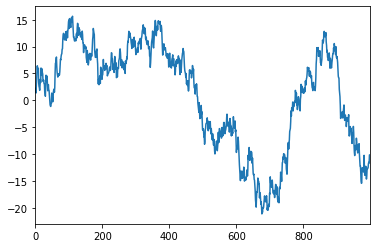

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data  = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

          A         B         C         D
0  0.765409  2.017663  0.663203 -0.703863
1 -0.781893  1.432395 -1.176868 -2.048685
2  0.597268  0.413705 -0.606395  0.690893
3 -1.848500  0.181674 -0.642415  0.091416
4  0.480634  0.349679 -0.999269 -0.360089


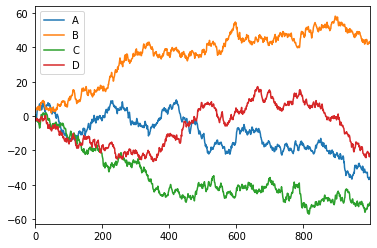

In [124]:
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list('ABCD'))
print(data.head())
data = data.cumsum()
data.plot()
plt.show()